**EfficientNet**

In [18]:
!pip install tensorflow opencv-python matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import os
import numpy as np

In [20]:
DATASET_PATH = r"C:\Users\user\Desktop\teeth classification\Teeth_Dataset" 


In [21]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
SEED = 42
NUM_CLASSES = 7

In [22]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "Training"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "Validation"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "Testing"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.


In [23]:
class_names = train_ds.class_names
print("Classes:", class_names)
print("Number of classes:", len(class_names))


Classes: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']
Number of classes: 7


In [24]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2)
])


In [25]:
normalization = layers.Rescaling(1./255)


In [26]:
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False


In [27]:
model = models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation="softmax")
])


In [28]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [29]:
early_stop = tf.keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 112s 546ms/step - accuracy: 0.5118 - loss: 1.5349 - val_accuracy: 0.7772 - val_loss: 0.7192
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 101s 521ms/step - accuracy: 0.6680 - loss: 0.9540 - val_accuracy: 0.8551 - val_loss: 0.4476
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 100s 520ms/step - accuracy: 0.7383 - loss: 0.7588 - val_accuracy: 0.8745 - val_loss: 0.3562
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 102s 527ms/step - accuracy: 0.7694 - loss: 0.6507 - val_accuracy: 0.9154 - val_loss: 0.2683
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 100s 517ms/step - accuracy: 0.7943 - loss: 0.5663 - val_accuracy: 0.9270 - val_loss: 0.2248
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 100s 517ms/step - accuracy: 0.8199 - loss: 0.5145 - val_accuracy: 0.9426 - val_loss: 0.1872
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 99s 514ms/step - accuracy: 0.8154 - loss: 0.5218 - val_accuracy: 0.9309 - val_loss: 0.1904
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 97s 503ms/step - accuracy: 0.8341 - l

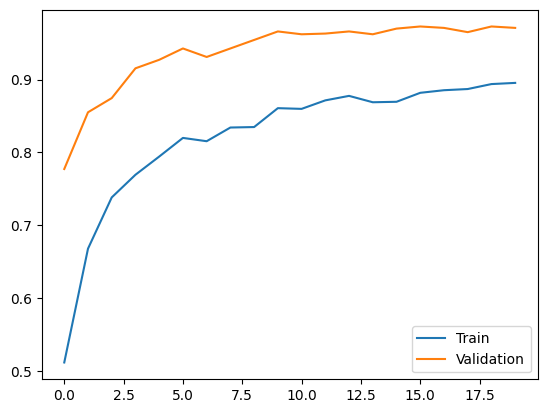

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train","Validation"])
plt.show()


In [31]:
test_loss, test_acc = model.evaluate(test_ds)
train_loss, train_acc = model.evaluate(train_ds)  

print("Train Accuracy:", train_acc)
print("Train Loss:", train_loss)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 382ms/step - accuracy: 0.9689 - loss: 0.0846
193/193 ━━━━━━━━━━━━━━━━━━━━ 76s 395ms/step - accuracy: 0.9880 - loss: 0.0391
Train Accuracy: 0.988014280796051
Train Loss: 0.039079561829566956
Test Accuracy: 0.9688715934753418
Test Loss: 0.08462805300951004


In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"C:\Users\user\Desktop\teeth classification\Teeth_Dataset\Testing\CaS\a_85_0_792.jpg"

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)   # add batch dimension

prediction = model.predict(img_array)

predicted_class = class_names[np.argmax(prediction)]

print("Prediction:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: CaS


In [34]:
model.save("EfficientNet.keras")